EDA - 1(BIKE DETAILS)

In [2]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('BIKE DETAILS.csv')


Questions:

1. What is the range of selling prices in the dataset?

Ans: min: 5000.0, max: 760000.0

In [6]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


2. What is the median selling price for bikes in the dataset?

Ans: 45000.0

3. What is the most common seller type?

Ans: Individual(1055)

In [7]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


4. How many bikes have driven more than 50,000 kilometers?

Ans: 170

In [8]:
len(df[df['km_driven']>50000])

170

5. What is the average km_driven value for each ownership type?

Ans:

In [9]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6. What proportion of bikes are from the year 2015 or older?

Ans: 56.64 %

In [10]:
len(df[df['year']<=2015])

601

In [11]:
propotion= (len(df[df['year']<=2015])/len(df['year']))*100
propotion

56.64467483506126

7. What is the trend of missing values across the dataset?

Ans:

In [12]:
df_1= pd.read_csv('BIKE DETAILS.csv')
df_1.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


8. What is the highest ex_showroom_price recorded, and for which bike?

Ans: 1278000.0

In [13]:
max(df['ex_showroom_price'].fillna(df['ex_showroom_price'].median()))

1278000.0

9. What is the total number of bikes listed by each seller type?

Ans:

In [14]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


10. What is the relationship between selling_price and km_driven for first-owner bikes?

Ans:

<Axes: xlabel='selling_price', ylabel='km_driven'>

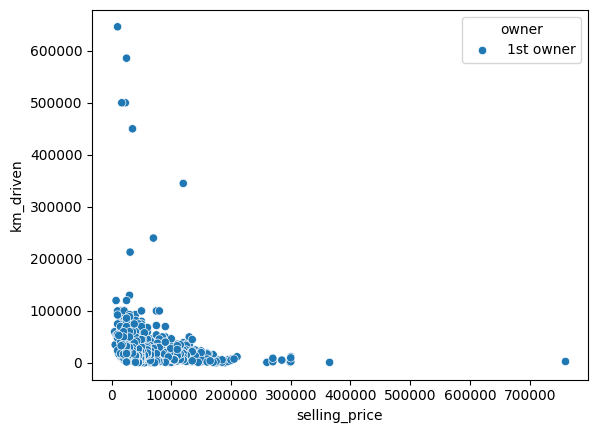

In [15]:
first_owner_bikes = df[df['owner']== '1st owner']
sns.scatterplot(x='selling_price',y='km_driven',hue='owner',data=first_owner_bikes )

11. Identify and remove outliers in the km_driven column using the IQR method?

Ans:

In [16]:
Q1= df['km_driven'].quantile(.25)
Q3= df['km_driven'].quantile(.75)
IQR= Q3-Q1
lower_fence= Q1 - 1.5*IQR
upper_fence= Q3 + 1.5*IQR
lower_fence,upper_fence

df_no_outliers = df[(df['km_driven'] >= lower_fence) & (df['km_driven'] <= upper_fence)]
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

Original dataset size: 1061
Dataset size after removing outliers: 1022


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

Ans:

Text(0.5, 1.0, 'Year vs. Selling Price')

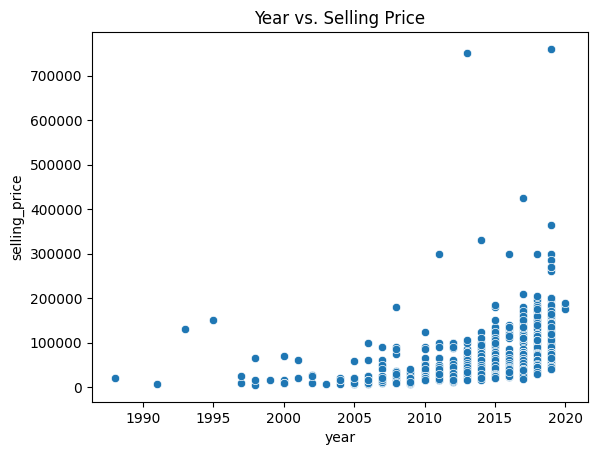

In [17]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs. Selling Price')

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
Ans:

In [18]:
current_year = 2025  # As per provided context
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean()
avg_depreciation_by_age

,depreciation
age,
5,-34260.000000
6,2954.562500
7,13023.194805
8,22306.082353
9,28328.190476
10,28013.275000
11,34505.606061
12,43086.886792
13,37317.648649


14. Which bike names are priced significantly above the average price for their manufacturing year?

Ans:

In [19]:
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.columns = ['year', 'avg_selling_price']
df_with_avg = df.merge(avg_price_by_year, on='year')
df_above_avg = df_with_avg[df_with_avg['selling_price'] > df_with_avg['avg_selling_price'] * 1.5]
print("Bikes priced significantly above average for their year:")
print(df_above_avg[['name', 'year', 'selling_price', 'avg_selling_price']])

Bikes priced significantly above average for their year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_selling_price  
2         87660.374046  
7         34289.285714  
13       119689.511628  
18        87660.374046  
23       119689.511628  


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

Ans:

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


<Axes: >

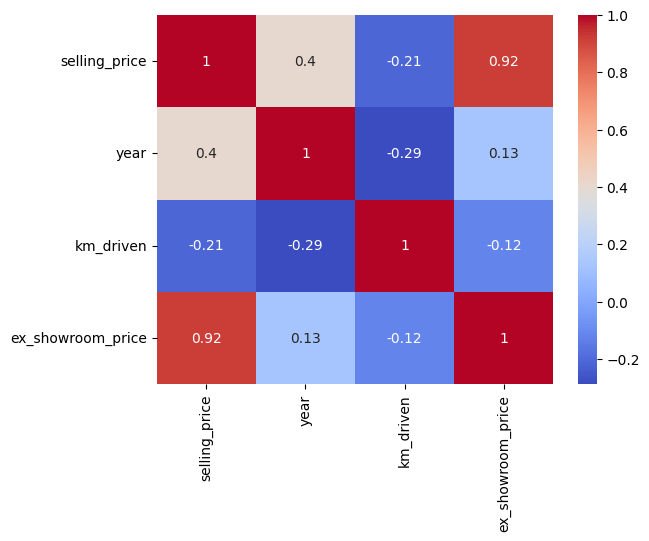

In [20]:
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

**EDA-2(Car Sale)**

In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
df= pd.read_csv('Car Sale.csv')

***Questions: ***

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Ans:

In [22]:
df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=True)

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
Pitre Buick-Pontiac-Gmc of Scottsdale,27404.248408
Chrysler Plymouth,27555.526400
McKinney Dodge Chrysler Jeep,27684.096979
Clay Johnson Auto Sales,27816.027113
Nebo Chevrolet,27818.889415
Hatfield Volkswagen,27853.712242
New Castle Ford Lincoln Mercury,27867.131955
Progressive Shippers Cooperative Association No,27884.264036


2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
Ans: Lincoln

In [23]:
df.groupby('Company')['Price ($)'].std().sort_values(ascending=True).idxmax()

'Lincoln'

In [24]:
df.groupby('Company')['Price ($)'].std().sort_values(ascending=True)

,Price ($)
Company,
Hyundai,3485.982649
Porsche,5261.839206
Acura,8183.046414
Jeep,9459.834418
Jaguar,10222.531533
Honda,11148.629062
Dodge,11187.592085
Chrysler,11583.286811
Mitsubishi,11671.343035


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
Ans:

In [25]:
# distribution:
df.groupby('Transmission')['Price ($)'].sum()

,Price ($)
Transmission,
Auto,355112220
Manual,316413245


In [26]:
# Interquartile range
iqr_by_transmission = df.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_by_transmission['iqr'] = iqr_by_transmission[0.75] - iqr_by_transmission[0.25]
print("Interquartile Range by Transmission:")
print(iqr_by_transmission)


Interquartile Range by Transmission:
                 0.25     0.75      iqr
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


4. What is the distribution of car prices across different regions?

Ans:

In [27]:
df.groupby('Dealer_Region')['Price ($)'].sum().sort_values()

,Price ($)
Dealer_Region,
Middletown,87134628
Pasco,88040714
Greenville,88149602
Aurora,88687382
Scottsdale,95969374
Janesville,106351234
Austin,117192531


5. What is the distribution of cars based on body styles?

Ans:

In [28]:
df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


6. How does the average selling price of cars vary by customer gender and annual income?

Ans:

In [29]:
df.groupby(['Gender','Annual Income'])['Price ($)'].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

Ans:

In [30]:
# distribution of car prices by region
df.groupby('Dealer_Region')['Price ($)'].sum()

,Price ($)
Dealer_Region,
Aurora,88687382
Austin,117192531
Greenville,88149602
Janesville,106351234
Middletown,87134628
Pasco,88040714
Scottsdale,95969374


In [31]:
# number of cars sold vary by region:
df['Dealer_Region'].value_counts().sort_values()

,count
Dealer_Region,
Middletown,3128
Greenville,3128
Aurora,3130
Pasco,3131
Scottsdale,3433
Janesville,3821
Austin,4135


8. How does the average car price differ between cars with different engine sizes?

Ans:

In [32]:
df.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


9. How do car prices vary based on the customer’s annual income bracket?

Ans:

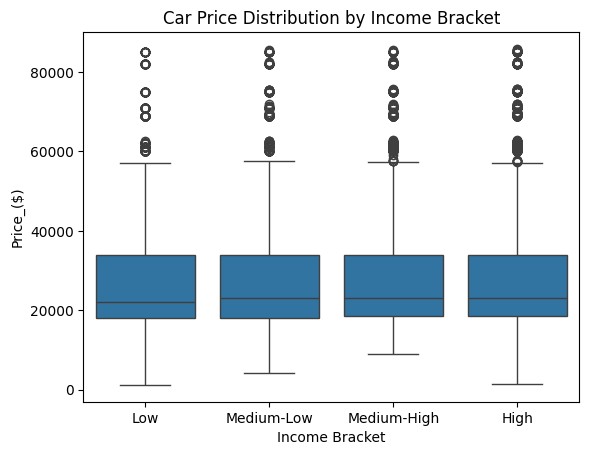

In [33]:
df['income_bracket'] = pd.qcut(df['Annual Income'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
sns.boxplot(x='income_bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price_($)')
plt.show()

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Ans:

In [34]:
# 5 car models with the highest number of sales
top_models= df['Model'].value_counts().head(5)
top_models

,count
Model,
Diamante,418
Prizm,411
Silhouette,411
Passat,391
Ram Pickup,383


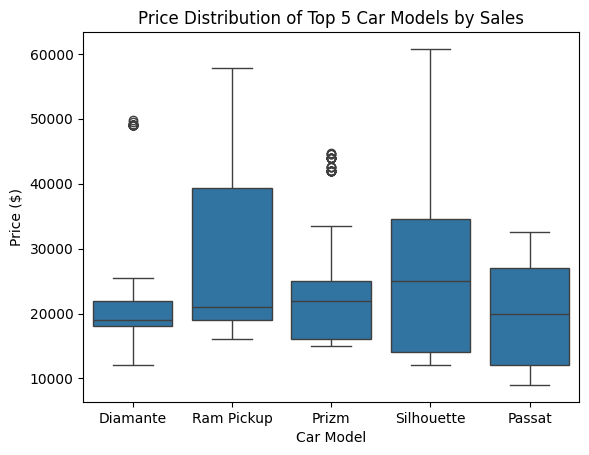

In [35]:
# price distribution
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models.index)])
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

Ans:

In [36]:
#  car price vary with engine size across different car colors
df.groupby(['Engine','Color'])['Price ($)'].std().sort_values()

Engine                     Color     
DoubleÂ Overhead Camshaft  Black         12418.674126
Overhead Camshaft          Pale White    13000.103061
DoubleÂ Overhead Camshaft  Red           13499.354247
                           Pale White    14402.413401
Overhead Camshaft          Red           17346.642554
                           Black         17457.405345
Name: Price ($), dtype: float64

In [37]:
# which colors have the highest price variation
df.groupby(['Engine','Color'])['Price ($)'].std().idxmax()

('Overhead Camshaft', 'Black')

12. Is there any seasonal trend in car sales based on the date of sale?

Ans:

In [38]:
updated_date= pd.to_datetime(df['Date'])
df['month'] = updated_date.dt.month
sales_by_month = df['month'].value_counts().sort_index()
sales_by_month

,count
month,
1,790
2,735
3,1535
4,1655
5,1895
6,1715
7,1725
8,1705
9,3305


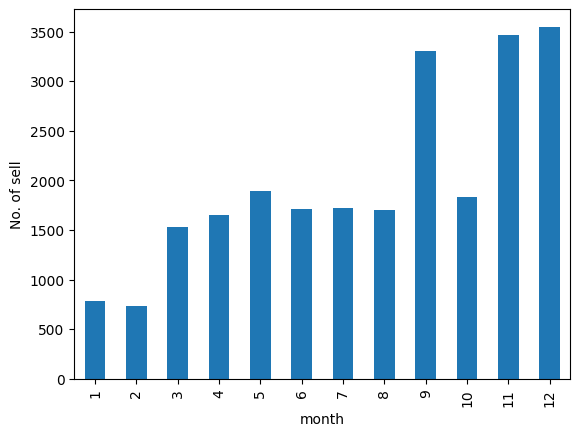

In [39]:
sales_by_month.plot(kind='bar')
plt.ylabel('No. of sell')
plt.show()

13. How does the car price distribution change when considering different combinations of body style and transmission type?
Ans:

In [40]:
df.groupby(['Body Style','Transmission'])['Price ($)'].std().sort_values()

,,Price ($)
Body Style,Transmission,
Hatchback,Auto,13144.014337
SUV,Auto,13299.927913
Hardtop,Auto,13687.756740
Passenger,Auto,13946.481932
Hardtop,Manual,14072.501848
Sedan,Auto,14310.910860
SUV,Manual,14621.526541
Sedan,Manual,15440.056434
Hatchback,Manual,16284.049616


14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact? bold text
Ans:

In [41]:
df['engine_encoded'] = df['Engine'].astype('category').cat.codes
correlation= df[['Price ($)','engine_encoded','Annual Income']].corr()
correlation

,Price ($),engine_encoded,Annual Income
Price ($),1.000000,-0.011271,0.012065
engine_encoded,-0.011271,1.000000,-0.006598
Annual Income,0.012065,-0.006598,1.000000


<Axes: >

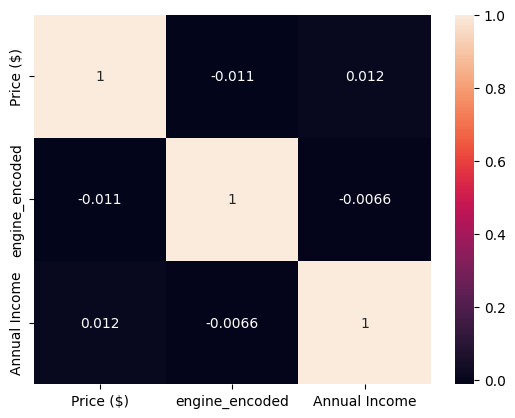

In [42]:
sns.heatmap(correlation,annot= True)

15. How does the average car price vary across different car models and engine types?

Ans:

In [43]:
df.groupby(['Model','Engine'])['Price ($)'].mean().unstack()

Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


**EDA-3(Amazon)**

In [44]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [45]:
df= pd.read_csv('amazon.csv')

**Questions:**

1. What is the average rating for each product category?

Ans:

In [46]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])
df.groupby('main_category')['rating'].mean()

,rating
main_category,
Car&Motorbike,3.800000
Computers&Accessories,4.154967
Electronics,4.081749
Health&PersonalCare,4.000000
Home&Kitchen,4.040716
HomeImprovement,4.250000
MusicalInstruments,3.900000
OfficeProducts,4.309677
Toys&Games,4.300000


2. What are the top rating_count products by category?

Ans:

In [47]:
top_rating_count = df.groupby(['main_category', 'product_name'])['rating_count'].max().reset_index()
top_rating_count = top_rating_count.sort_values(['main_category', 'rating_count'], ascending=[True, False])
top_rating_count_by_category = top_rating_count.groupby('main_category').head(1)
print(top_rating_count_by_category)

              main_category  \
0             Car&Motorbike   
349   Computers&Accessories   
486             Electronics   
852     Health&PersonalCare   
991            Home&Kitchen   
1302        HomeImprovement   
1303     MusicalInstruments   
1307         OfficeProducts   
1336             Toys&Games   

                                           product_name rating_count  
0     Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
349   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974  
486        Eveready Red 1012 AAA Batteries - Pack of 10          989  
852   Dr Trust Electronic Kitchen Digital Scale Weig...        3,663  
991   Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
1302  Gizga Essentials Cable Organiser, Cord Managem...        5,985  
1303  Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68,664  
1307  COI Note Pad/Memo Book with Sticky Notes & Cli...        9,344  
1336  Faber-Castell Connector Pen Set - Pack of 25

3. What is the distribution of discounted prices vs. actual prices?

Ans:

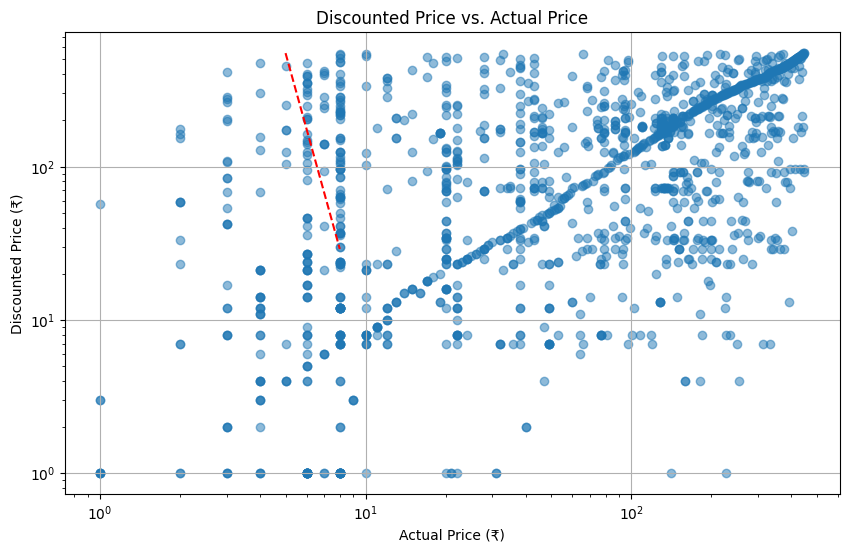

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.xscale('log')
plt.yscale('log')
plt.plot([df['actual_price'].min(), df['actual_price'].max()],
         [df['actual_price'].min(), df['actual_price'].max()], 'r--')
plt.grid(True)
plt.savefig('price_distribution.png')
plt.show()

4. How does the average discount percentage vary across categories?

Ans:

In [49]:
df['discount_percentage'] = df['discount_percentage'].replace('%', '',regex= True).astype(float)
df.groupby('main_category')['discount_percentage'].mean().sort_values()

,discount_percentage
main_category,
Toys&Games,0.000000
OfficeProducts,12.354839
Home&Kitchen,40.120536
Car&Motorbike,42.000000
MusicalInstruments,46.000000
Electronics,50.828897
Health&PersonalCare,53.000000
Computers&Accessories,54.024283
HomeImprovement,57.500000


5. What are the most popular product names?

Ans:

In [50]:
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)
df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

,rating_count
product_name,
"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",853945.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black",426973.0
"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black",426973.0
"JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)",385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink),363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black),363711.0
"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery",313836.0
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery",313836.0


6. What are the most popular product keywords?

Ans:

In [51]:
from collections import Counter
import re

print("\nQ6: Most popular product keywords")
def extract_keywords(text):
    words = re.findall(r'\w+', text.lower())
    return [word for word in words if word not in {'for', 'and', 'with', 'in', 'to', 'of', 'a', 'the'}]

all_keywords = df['product_name'].apply(extract_keywords).explode()
keyword_counts = Counter(all_keywords)
top_keywords = pd.Series(keyword_counts).sort_values(ascending=False).head(10)
print(top_keywords)


Q6: Most popular product keywords
black       530
usb         417
cable       414
1           413
c           289
3           275
2           267
charging    247
type        243
fast        212
dtype: int64


7. What are the most popular product reviews?

Ans:

In [52]:
df.sort_values(['rating', 'rating_count'], ascending=[False, False])[['product_name', 'review_title', 'review_content', 'rating', 'rating_count']].head(5)

,product_name,review_title,review_content,rating,rating_count
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,"Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,5.0,23.0
174,Syncwire LTG to USB Cable for Fast Charging Co...,"Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,5.0,5.0
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Awesome Product,Quick delivery.Awesome ProductPacking was good...,5.0,NaN
1145,Swiffer Instant Electric Water Heater Faucet T...,"Best Product,It’s expansive but it works well ...",Must buy best Fabulous product I recommend thi...,4.8,53803.0
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...","Loved it,Good product,Good product,It's easy t...",I have used multiple air fryers. But this one ...,4.8,3964.0


8. What is the correlation between discounted_price and rating?

Ans:

In [53]:
from scipy.stats import pearsonr

df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'] = df['rating'].fillna(df['rating'].median())

correlation, p_value = pearsonr(df['discounted_price'], df['rating'])
print(f"Pearson correlation: {correlation:.4f}, p-value: {p_value:.4f}")

Pearson correlation: 0.1203, p-value: 0.0000


9. What are the Top 5 categories based on the highest rating?

Ans:

In [54]:
df.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(5)

,rating
main_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749


10. Identify any potential areas for improvement or optimization based on the data analysis.

Ans:
Based on the analysis:

Low-Rated Categories: Categories with lower average ratings (e.g., Home&Kitchen) may indicate quality issues or unmet customer expectations. Investigate specific products with low ratings to identify common complaints.

Discount Optimization: Categories with low discount percentages but high ratings (e.g., Electronics) suggest customers value quality over discounts. Focus on maintaining quality rather than aggressive discounting.

Keyword Insights: Popular keywords like 'cable', 'charging', and 'usb' indicate high demand for accessories. Expand product offerings in these areas.

Review Analysis: Negative reviews often mention durability and compatibility issues. Improve product descriptions to set clear expectations and enhance quality control.

Price-Rating Correlation: Weak correlation between price and rating suggests customers prioritize factors like durability and functionality over price. Emphasize these in marketing.

**EDA-4(spotify)**

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import uuid

In [56]:
df = pd.read_csv('spotify.csv')

**Questions:**

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful. bold text
Ans:

In [57]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values (if any, drop rows with missing critical columns)
df = df.dropna(subset=['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'])

Missing values before cleaning:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [58]:
# Check for duplicate rows
print("\nDuplicate rows before cleaning:", df.duplicated().sum())
# Remove duplicates
df = df.drop_duplicates()
print("Duplicate rows after cleaning:", df.duplicated().sum())


Duplicate rows before cleaning: 27
Duplicate rows after cleaning: 0


In [59]:
# Clean column names
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.lower()

In [60]:
# Ensure correct data types
df['popularity'] = df['popularity'].astype(int)
df['duration_ms'] = df['duration_ms'].astype(int)
df['artist'] = df['artist'].str.strip().str.lower()
df['track_name'] = df['track_name'].str.strip().str.lower()

In [61]:
# Verify cleaned data
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData Info:")
print(df.info())


Missing values after cleaning:
artist         0
track_name     0
popularity     0
duration_ms    0
track_id       0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       413 non-null    object
 1   track_name   413 non-null    object
 2   popularity   413 non-null    int64 
 3   duration_ms  413 non-null    int64 
 4   track_id     413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB
None


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

Ans:


Q2: Distribution of Popularity Among Tracks


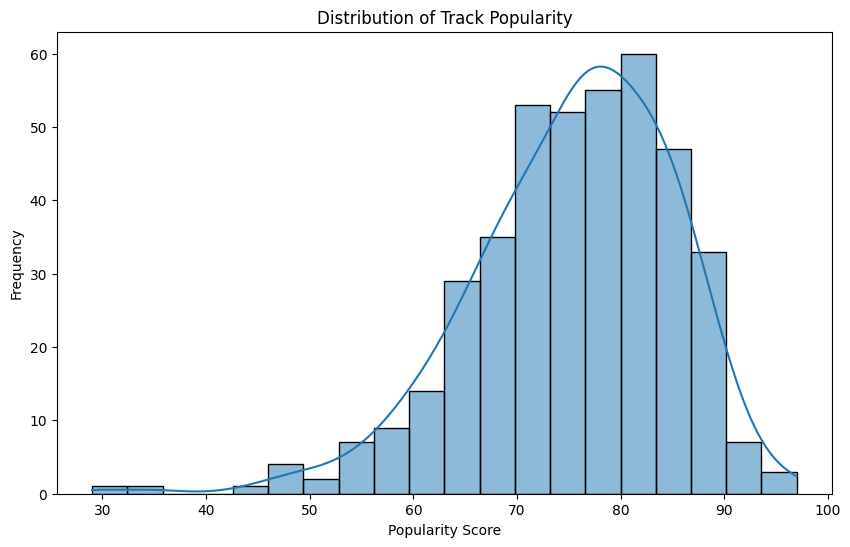

In [62]:
print("\nQ2: Distribution of Popularity Among Tracks")
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.savefig('popularity_distribution.png')
plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

Ans:

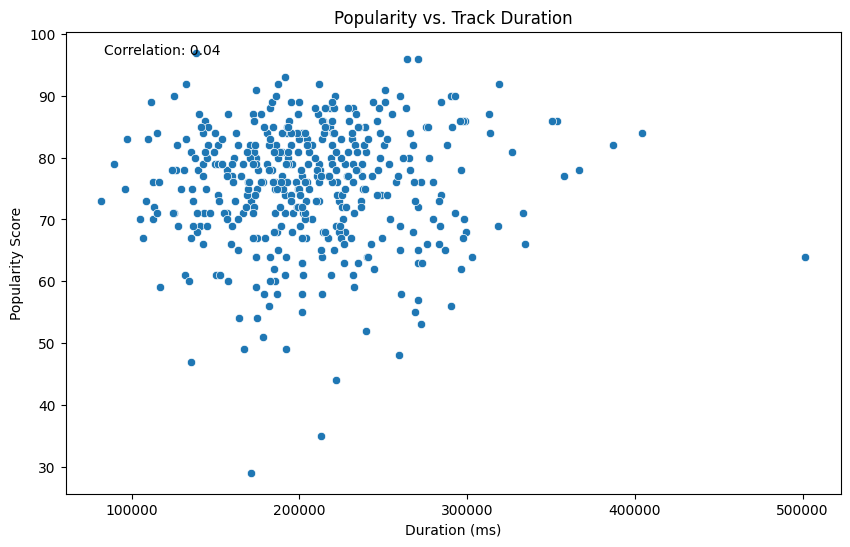

In [73]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=df)
plt.title('Popularity vs. Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity Score')
# Add correlation coefficient
correlation = df['popularity'].corr(df['duration_ms'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.savefig('popularity_vs_duration.png')
plt.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot. bold text

Ans:

Track Counts by Artist:
artist
drake          17
eminem         11
lil nas x      10
jay-z          10
21 savage      10
               ..
lil tjay        1
bigxthaplug     1
fat joe         1
a$ap ferg       1
diddy           1
Name: count, Length: 115, dtype: int64


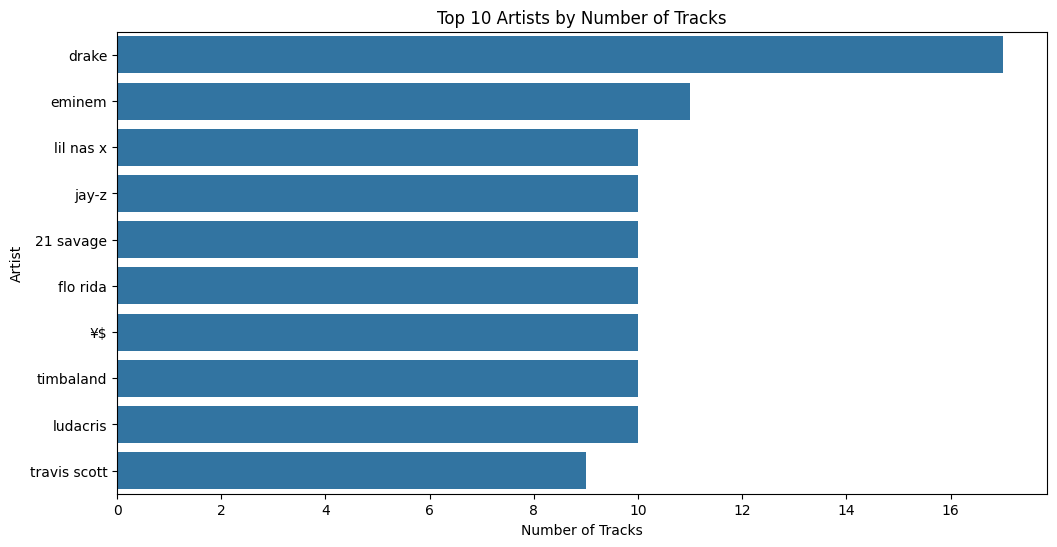

Artist with highest number of tracks: drake (17 tracks)


In [64]:

artist_track_counts = df['artist'].value_counts()
print("Track Counts by Artist:")
print(artist_track_counts)
plt.figure(figsize=(12, 6))
sns.countplot(y='artist', data=df, order=artist_track_counts.index[:10])
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.savefig('artist_track_counts.png')
plt.show()
print(f"Artist with highest number of tracks: {artist_track_counts.idxmax()} ({artist_track_counts.max()} tracks)")

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

Ans:

             artist                     track_name  popularity
207          pressa  attachments (feat. coi leray)          29
231   justin bieber                     intentions          35
413  french montana                splash brothers          44
225        lil baby                  on me - remix          47
407     wyclef jean      911 (feat. mary j. blige)          48


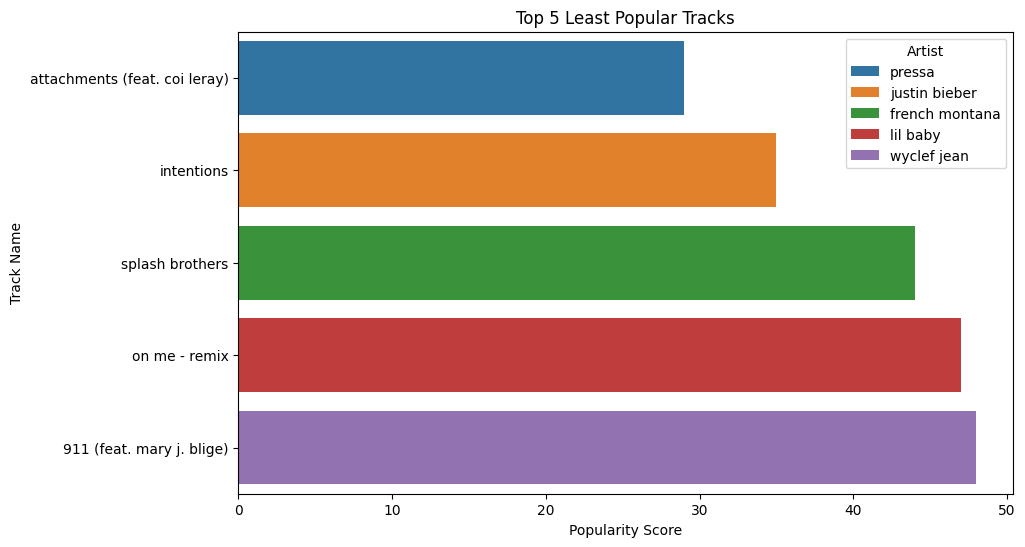

In [65]:
least_popular_tracks = df.nsmallest(5, 'popularity')[['artist', 'track_name', 'popularity']]
print(least_popular_tracks)
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_name', hue='artist', data=least_popular_tracks)
plt.title('Top 5 Least Popular Tracks')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.legend(title='Artist')
plt.savefig('least_popular_tracks.png')
plt.show()

6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist. bold text

Average Popularity for Top 5 Artists:
artist
21 savage    83.800000
eminem       83.636364
drake        82.882353
jay-z        77.900000
lil nas x    75.900000
Name: popularity, dtype: float64


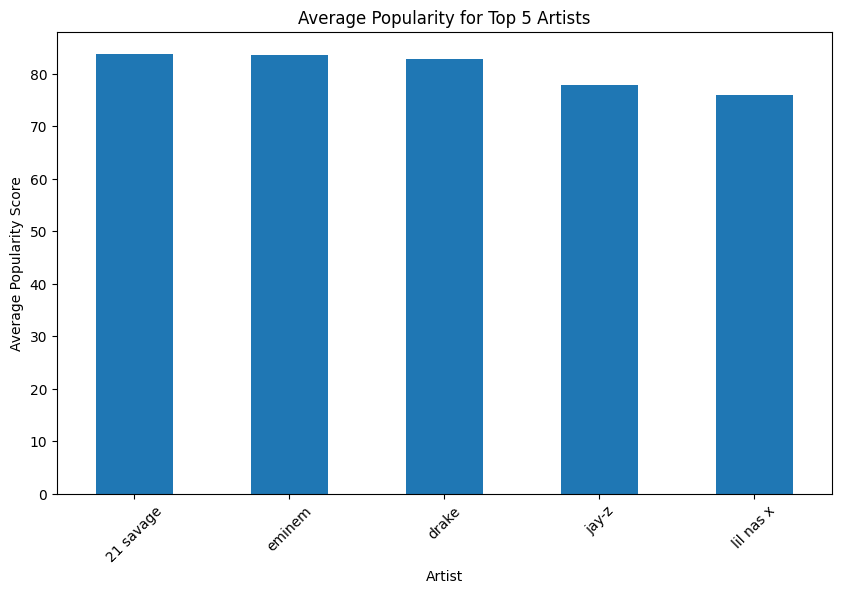

Artist with highest average popularity: 21 savage (83.80)


In [67]:
top_5_artists = artist_track_counts.head(5).index
avg_popularity = df[df['artist'].isin(top_5_artists)].groupby('artist')['popularity'].mean().sort_values(ascending=False)
print("Average Popularity for Top 5 Artists:")
print(avg_popularity)
plt.figure(figsize=(10, 6))
avg_popularity.plot(kind='bar')
plt.title('Average Popularity for Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.savefig('avg_popularity_top_artists.png')
plt.show()
print(f"Artist with highest average popularity: {avg_popularity.idxmax()} ({avg_popularity.max():.2f})")

7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [68]:
for artist in top_5_artists:
    most_popular_track = df[df['artist'] == artist][['track_name', 'popularity']].nlargest(1, 'popularity')
    print(f"Most popular track for {artist.title()}: {most_popular_track['track_name'].values[0]} (Popularity: {most_popular_track['popularity'].values[0]})")

Most popular track for Drake: rich baby daddy (feat. sexyy red & sza) (Popularity: 92)
Most popular track for Eminem: without me (Popularity: 90)
Most popular track for Lil Nas X: thats what i want (Popularity: 81)
Most popular track for Jay-Z: ni**as in paris (Popularity: 86)
Most popular track for 21 Savage: redrum (Popularity: 96)


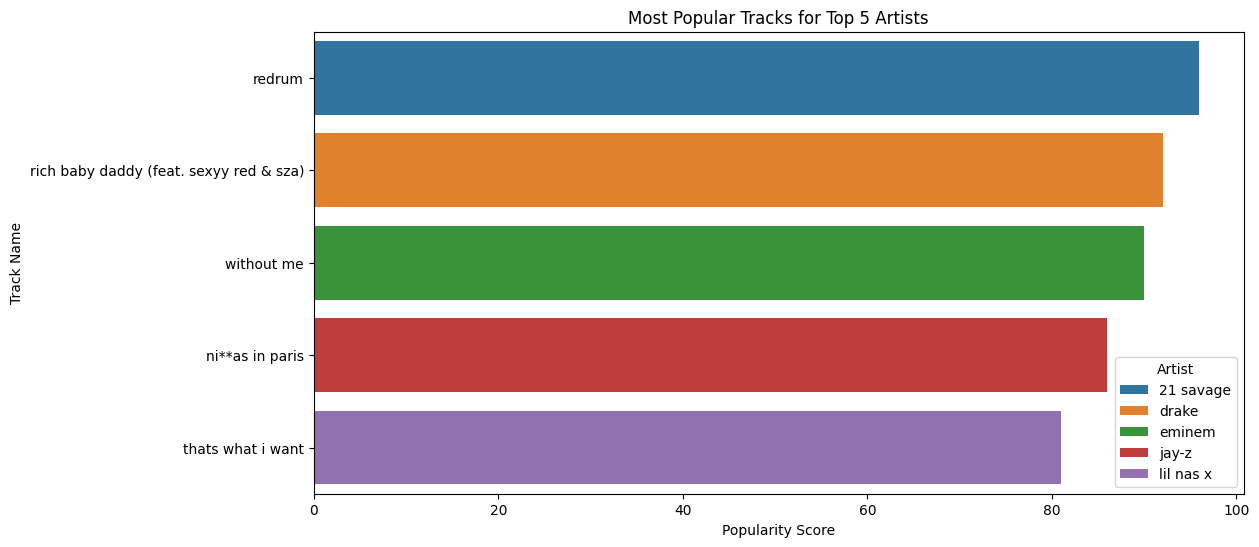

In [69]:
# Visualization
top_tracks = df[df['artist'].isin(top_5_artists)].groupby('artist').apply(lambda x: x.nlargest(1, 'popularity')).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='track_name', hue='artist', data=top_tracks)
plt.title('Most Popular Tracks for Top 5 Artists')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.legend(title='Artist')
plt.savefig('most_popular_tracks.png')
plt.show()

8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

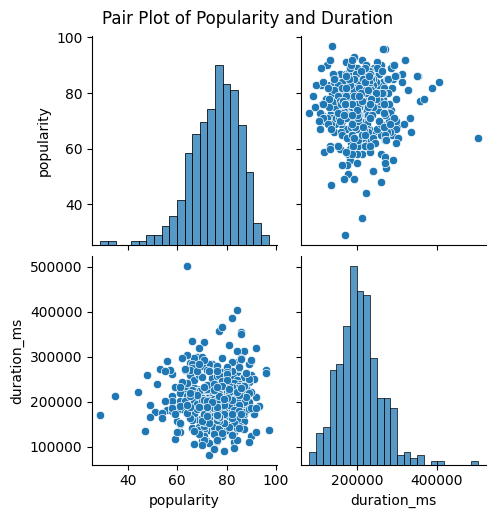

In [70]:
sns.pairplot(df[['popularity', 'duration_ms']])
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)
plt.savefig('pair_plot.png')
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

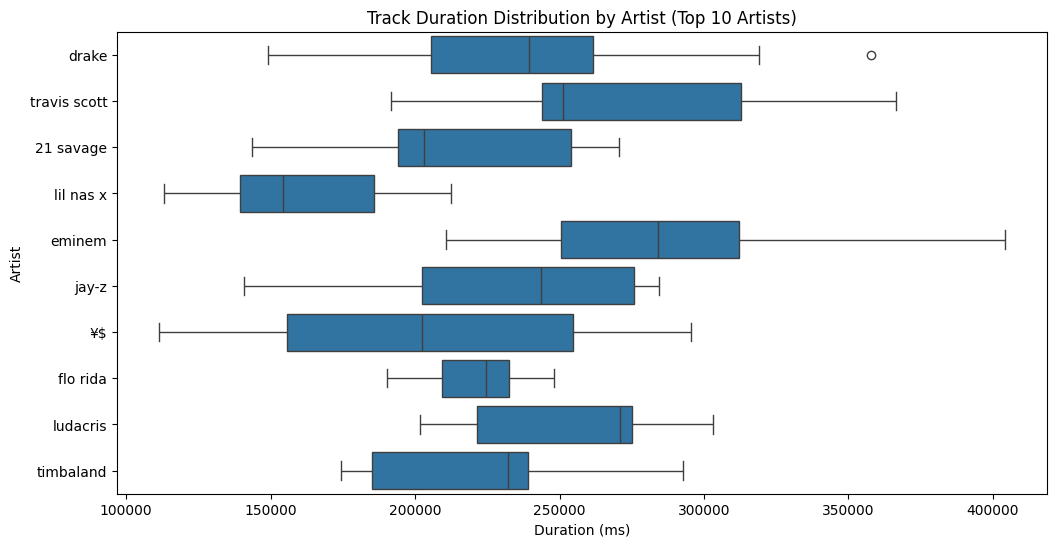

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='artist', x='duration_ms', data=df[df['artist'].isin(artist_track_counts.head(10).index)])
plt.title('Track Duration Distribution by Artist (Top 10 Artists)')
plt.xlabel('Duration (ms)')
plt.ylabel('Artist')
plt.savefig('duration_by_artist.png')
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot. bold text

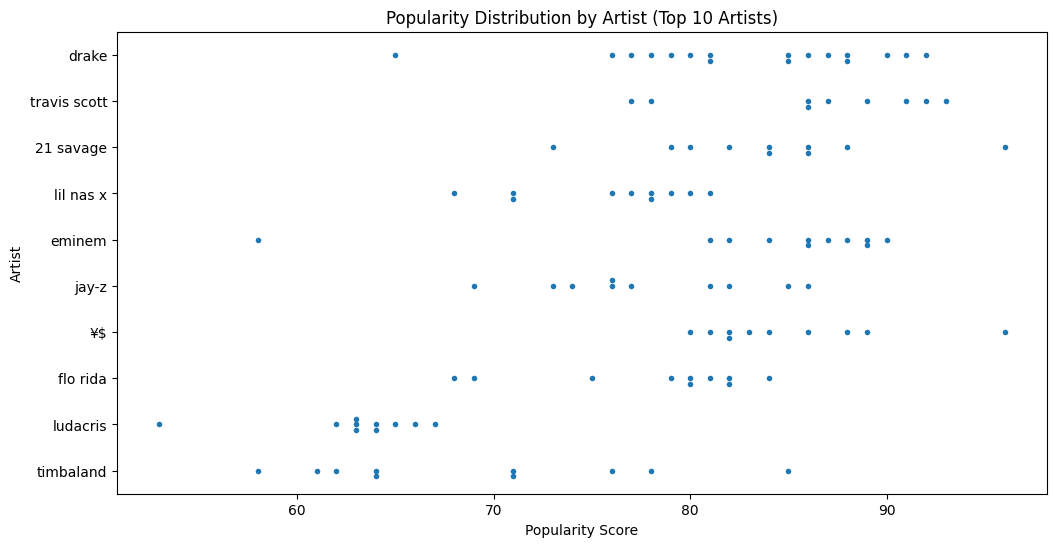

In [72]:
plt.figure(figsize=(12, 6))
sns.swarmplot(y='artist', x='popularity', data=df[df['artist'].isin(artist_track_counts.head(10).index)], size=4)
plt.title('Popularity Distribution by Artist (Top 10 Artists)')
plt.xlabel('Popularity Score')
plt.ylabel('Artist')
plt.savefig('popularity_by_artist_swarm.png')
plt.show()